CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


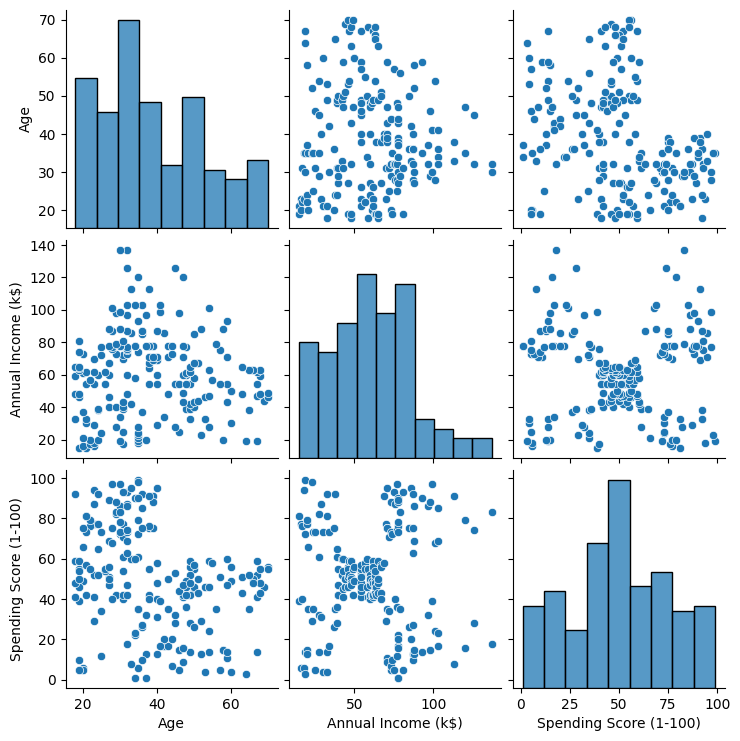

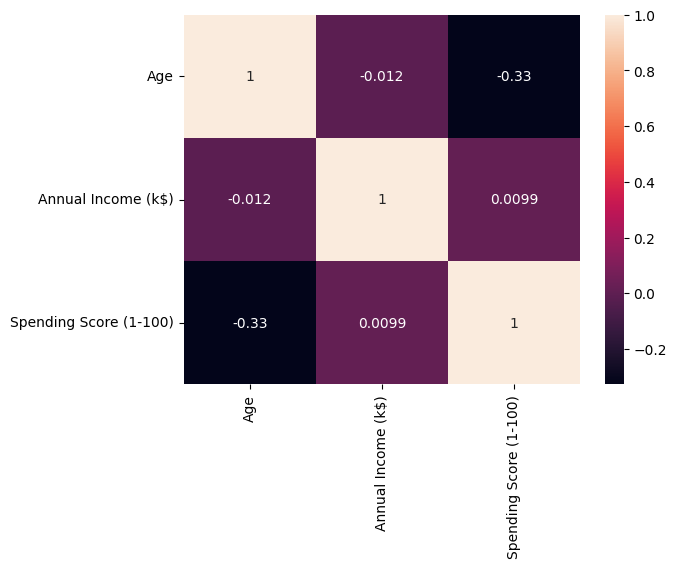

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

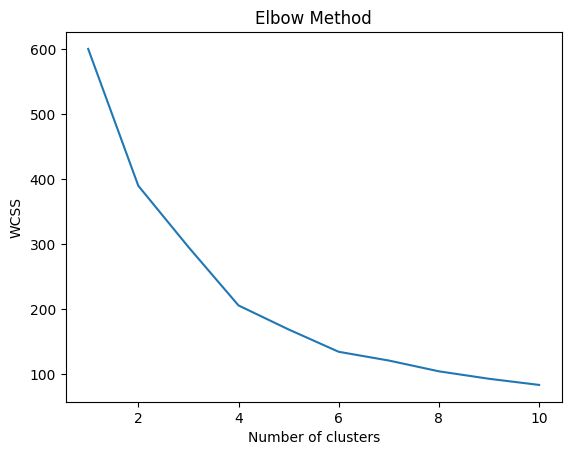

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-1-a0f3c6d009b1>:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Step 3: Data Preprocessing

## Data Cleaning: As a first step, let's check if there are any missing values
print(df.isnull().sum())

## For demonstration purposes, let's use only numerical columns 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
df_numerical = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

## Data Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Step 4: Exploratory Data Analysis (EDA)

## Plot pairplot to visualize the distributions and relationships
sns.pairplot(df_numerical)
plt.show()

## Plot correlation matrix
corr = df_numerical.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Step 5: Model Building

## Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

## Plotting the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Let's assume the optimal number of clusters is 5, which is a common choice based on the Elbow Method
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

## Adding cluster information back to the original data
df['Cluster'] = clusters

## Display mean statistics for each cluster to understand its characteristics
print(df.groupby('Cluster').mean())


## Model Evaluation
Internal Cluster Evaluation: You've already used WCSS (Within Cluster Sum of Squares) through the elbow method to evaluate the optimal number of clusters. You could also consider other metrics like the silhouette score.

In [2]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, clusters)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.41664341513732767


**Cluster Profiles**: You have the mean values for each cluster. You might also consider visualizing these using bar charts or radar charts for better interpretability.



<ipython-input-3-53d54599bf27>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


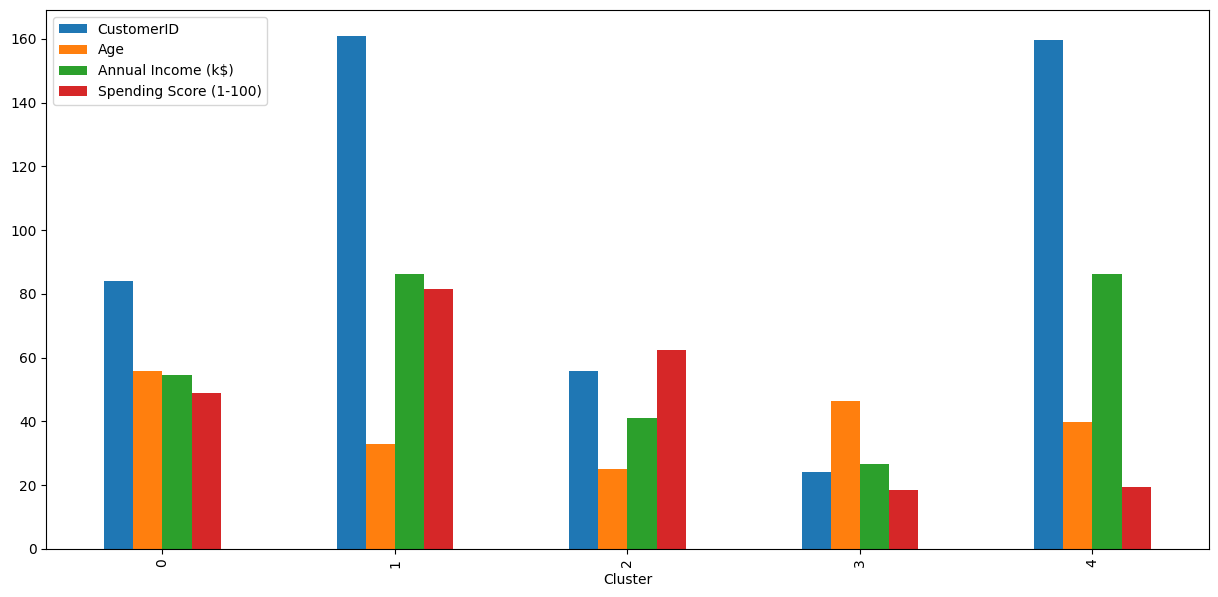

In [3]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary.plot(kind='bar', figsize=(15, 7))
plt.show()
